In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import NuSVR
from statsmodels.stats.stattools import durbin_watson
import math
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error
from scipy import stats
from scipy.stats import shapiro
from sklearn import metrics
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [2]:
df = pd.read_csv("data.txt", sep='  ', header=None)


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df.columns = ["Lever position", "Ship speed", "GT shaft torque", "GT rate of revolutions",
                          "Gas Generator rate of revolutions", "Starboard Propeller Torque","Port Propeller Torque",
                          "Turbine exit temperature", "GT Compressor inlet air temperature",
                          "GT Compressor outlet air temperature", "HP Turbine exit pressure", 
                         "GT Compressor inlet air pressure", "GT Compressor outlet air pressure",
                         "GT exhaust gas pressure", "Turbine Injecton Control", "Fuel flow",
                         "GT Compressor decay coeff", "GT Turbine decay coeff"]

In [4]:
df.head(20)

,Lever position,Ship speed,GT shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay coeff,GT Turbine decay coeff
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
5,6.175,18.0,29792.731,2307.404,8828.360,246.278,246.278,800.434,288.0,676.397,2.501,0.998,13.356,1.030,35.760,0.708,0.95,0.975
6,7.148,21.0,38982.180,2678.086,9132.429,332.077,332.077,854.747,288.0,699.954,2.963,0.998,15.679,1.035,45.881,0.908,0.95,0.975
7,8.206,24.0,50996.808,3087.561,9318.562,437.989,437.989,952.122,288.0,741.770,3.576,0.998,18.632,1.040,62.440,1.236,0.95,0.975
8,9.300,27.0,72763.329,3560.395,9778.528,644.905,644.905,1115.797,288.0,789.094,4.498,0.998,22.811,1.049,92.556,1.832,0.95,0.975
9,1.138,3.0,379.880,1355.375,6683.916,7.915,7.915,464.017,288.0,550.985,1.100,0.998,5.963,1.019,3.879,0.079,0.95,0.976


In [5]:
df.describe()

,Lever position,Ship speed,GT shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay coeff,GT Turbine decay coeff
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique())

Lever position
[1.138 2.088 3.144 4.161 5.14  6.175 7.148 8.206 9.3  ]
Ship speed
[ 3.  6.  9. 12. 15. 18. 21. 24. 27.]
GT shaft torque
[  289.964  6960.18   8379.229 ... 39003.867 50992.579 72775.13 ]
GT rate of revolutions
[1349.489 1376.166 1386.757 ... 1344.618 1406.601 1345.441]
Gas Generator rate of revolutions
[6677.38  6828.469 7111.811 ... 9120.889 9300.274 9742.95 ]
Starboard Propeller Torque
[ 7.584 28.204 60.358 ... 22.335 10.692 22.478]
Port Propeller Torque
[ 7.584 28.204 60.358 ... 22.335 10.692 22.478]
Turbine exit temperature
[ 464.006  635.401  606.002 ...  796.457  892.945 1038.411]
GT Compressor inlet air temperature
[288.]
GT Compressor outlet air temperature
[550.563 581.658 587.587 ... 680.393 722.029 767.595]
HP Turbine exit pressure
[1.096 1.331 1.389 1.658 2.078 2.501 2.963 3.576 4.498 1.1   1.33  1.657
 3.575 4.496 1.117 2.962 3.574 4.495 1.142 1.326 2.5   2.961 4.494 1.163
 1.324 1.388 2.077 3.573 4.493 1.178 1.656 2.96  3.572 4.492 1.207 1.323
 2.499 3.571 

In [7]:
df

,Lever position,Ship speed,GT shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay coeff,GT Turbine decay coeff
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15.0,21624.934,1924.342,8470.013,175.239,175.239,681.658,288.0,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18.0,29763.213,2306.745,8800.352,245.954,245.954,747.405,288.0,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21.0,39003.867,2678.052,9120.889,332.389,332.389,796.457,288.0,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24.0,50992.579,3087.434,9300.274,438.024,438.024,892.945,288.0,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


Converting Ship speed from integer type to category for data exploration 

In [8]:
speed = pd.api.types.CategoricalDtype(categories=[3.0,  6.0,  9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0],
                                          ordered=True)

In [9]:
df['Ship speed']=df['Ship speed'].astype(speed)

In [10]:
df=df.drop(columns=['GT Compressor inlet air pressure','GT Compressor inlet air temperature'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Lever position                        11934 non-null  float64 
 1   Ship speed                            11934 non-null  category
 2   GT shaft torque                       11934 non-null  float64 
 3   GT rate of revolutions                11934 non-null  float64 
 4   Gas Generator rate of revolutions     11934 non-null  float64 
 5   Starboard Propeller Torque            11934 non-null  float64 
 6   Port Propeller Torque                 11934 non-null  float64 
 7   Turbine exit temperature              11934 non-null  float64 
 8   GT Compressor outlet air temperature  11934 non-null  float64 
 9   HP Turbine exit pressure              11934 non-null  float64 
 10  GT Compressor outlet air pressure     11934 non-null  float64 
 11  GT

In [12]:
cat_cols= ['Ship speed']

In [13]:
numeric_cols = list(set(df.columns)-set(['Ship speed']))

In [14]:
numeric_cols

['GT rate of revolutions',
 'GT Turbine decay coeff',
 'GT Compressor outlet air pressure',
 'Starboard Propeller Torque',
 'Fuel flow',
 'GT Compressor decay coeff',
 'Turbine exit temperature',
 'GT exhaust gas pressure',
 'Lever position',
 'Turbine Injecton Control',
 'HP Turbine exit pressure',
 'GT shaft torque',
 'Port Propeller Torque',
 'GT Compressor outlet air temperature',
 'Gas Generator rate of revolutions']

[]

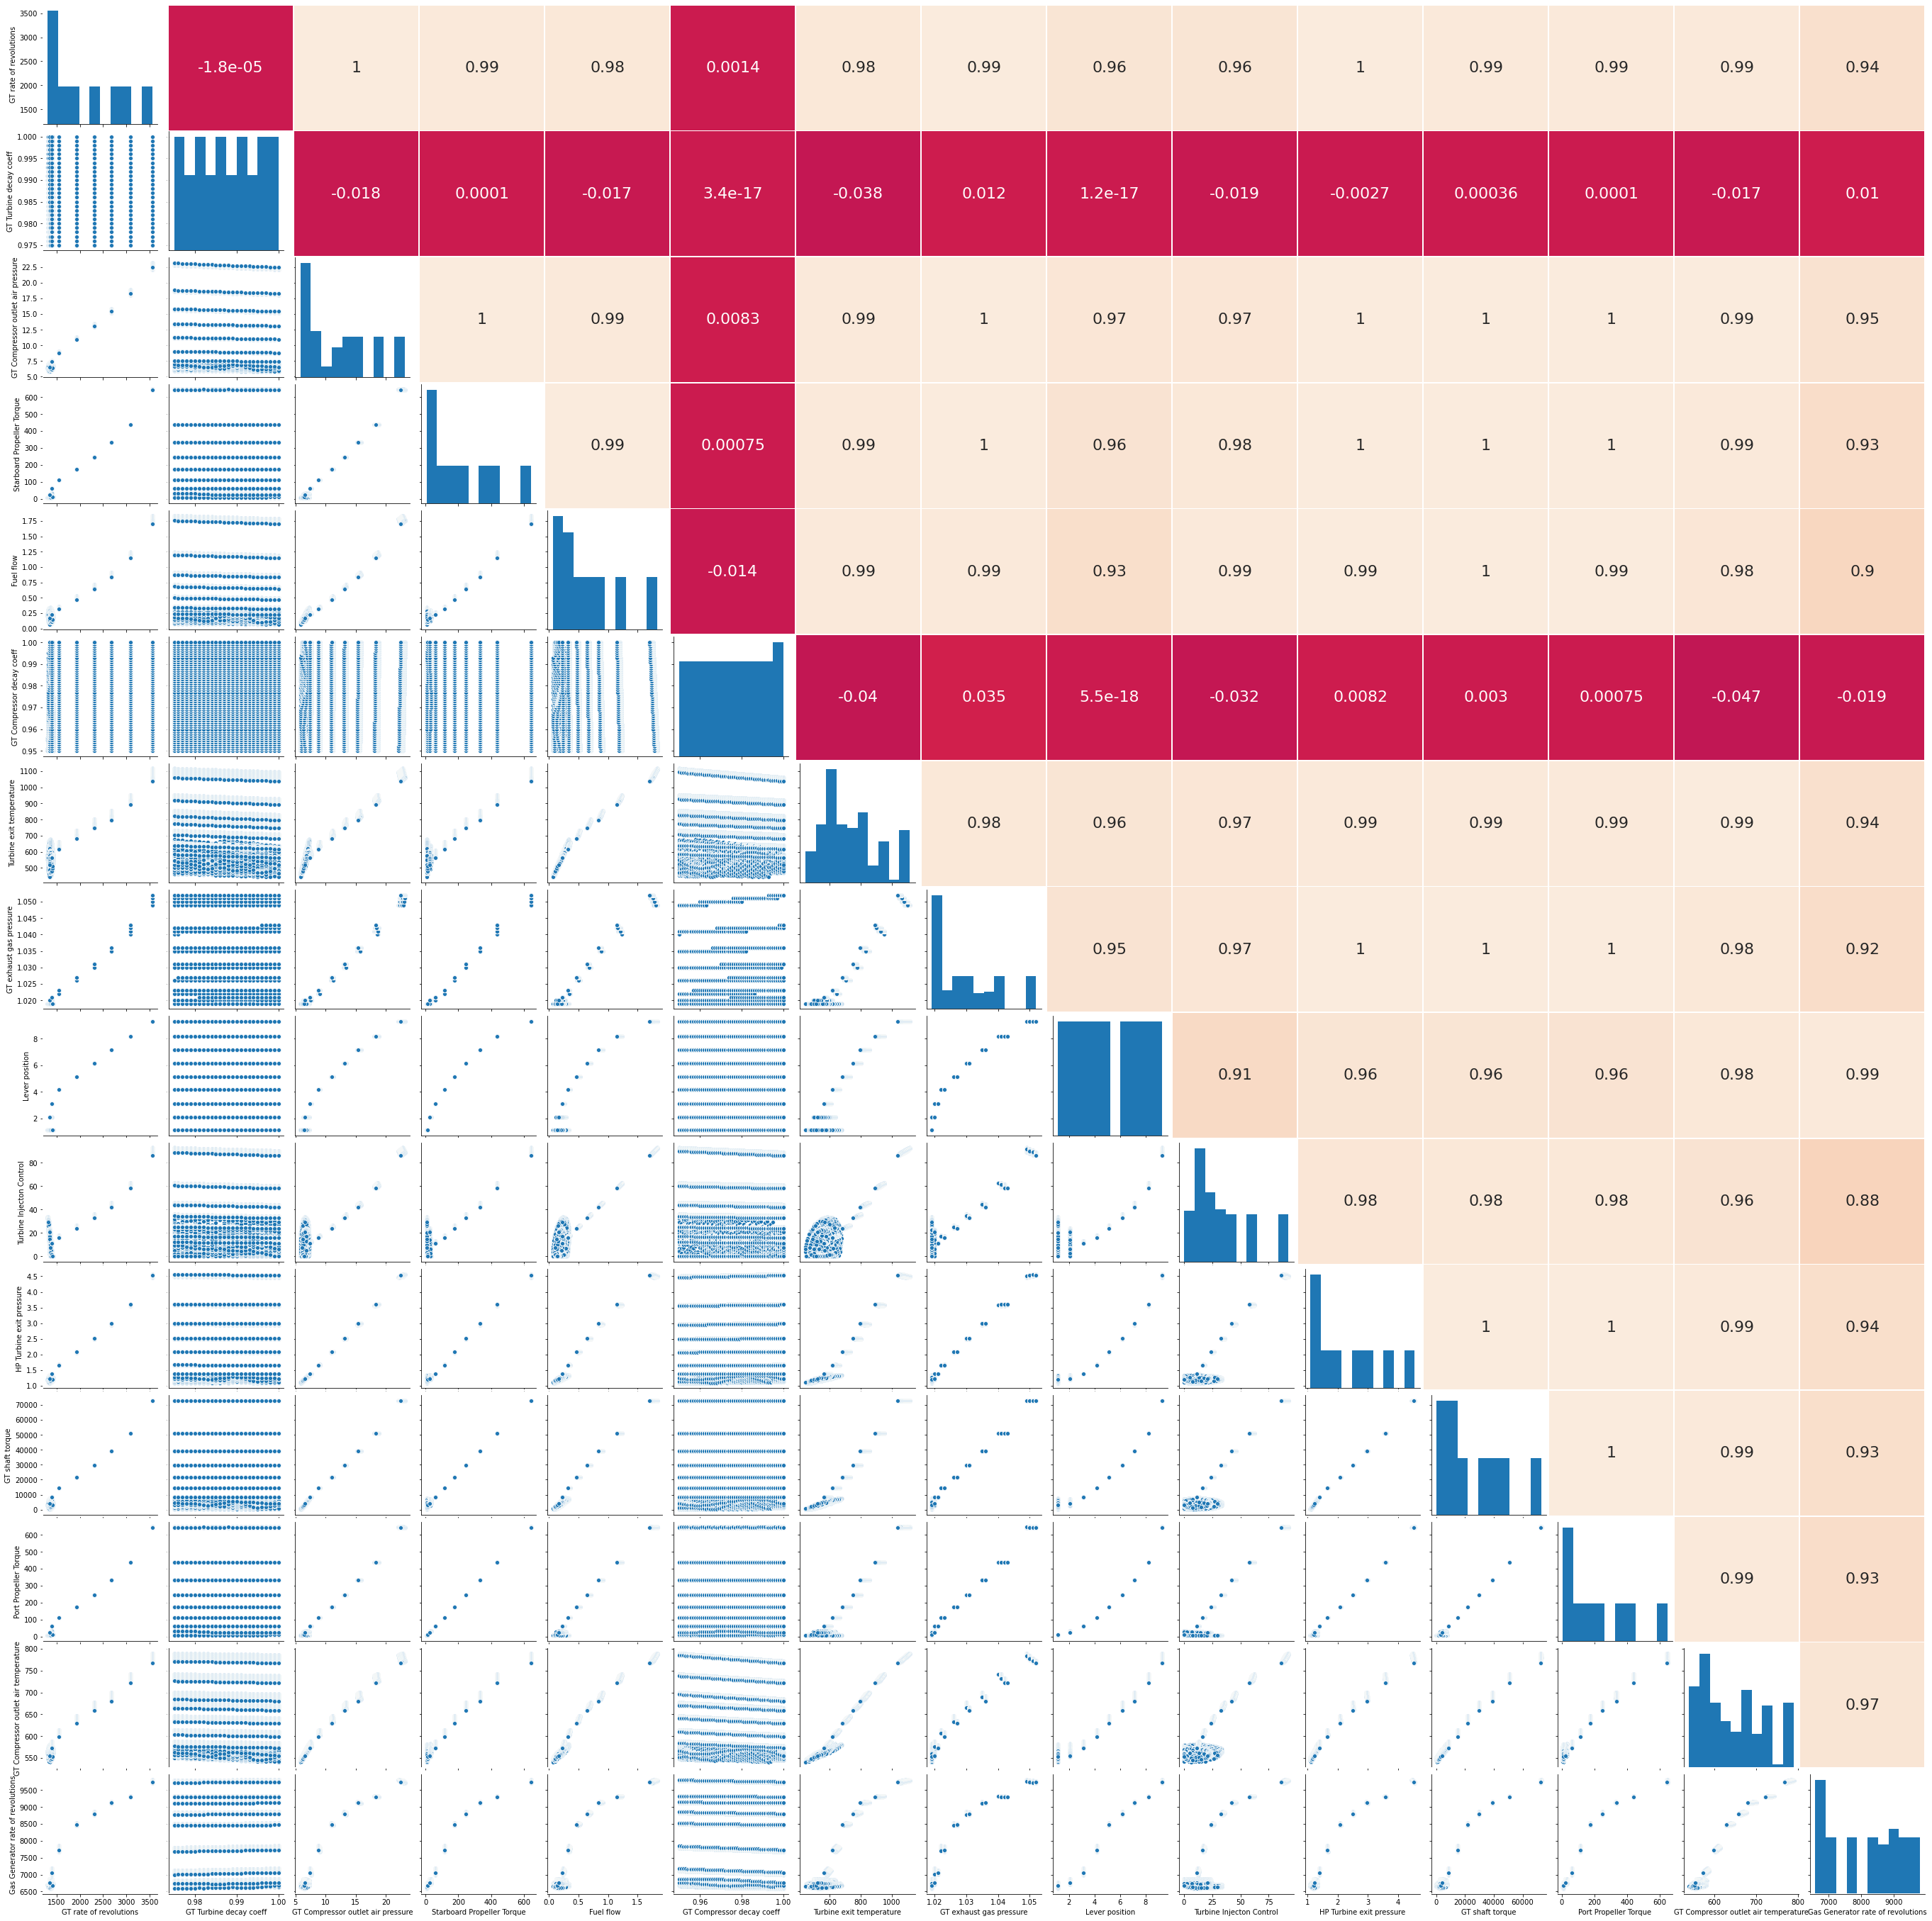

In [15]:

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

a=sns.pairplot(df,vars=numeric_cols)
a.map_upper(hide_current_axis)
(xmin, _), (_, ymax) = a.axes[0, 0].get_position().get_points()
(_, ymin), (xmax, _) = a.axes[-1, -1].get_position().get_points()

ax = a.fig.add_axes([xmin, ymin, xmax - xmin, ymax - ymin], facecolor='none')

corr1 = df[numeric_cols].corr()
mask1 = np.tril(np.ones_like(corr1, dtype=bool))
sns.heatmap(corr1, mask=mask1, vmax=1, vmin=-1,
            linewidths=.5, cbar=False, annot=True, annot_kws={'size': 22}, ax=ax)
ax.set_xticks([])
ax.set_yticks([])

In [16]:
df1=df.drop(columns=['Ship speed','Lever position'])

df1.columns

Index(['GT shaft torque', 'GT rate of revolutions',
       'Gas Generator rate of revolutions', 'Starboard Propeller Torque',
       'Port Propeller Torque', 'Turbine exit temperature',
       'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
       'GT Compressor outlet air pressure', 'GT exhaust gas pressure',
       'Turbine Injecton Control', 'Fuel flow', 'GT Compressor decay coeff',
       'GT Turbine decay coeff'],
      dtype='object')

Checking for normality distribution and if any transformation can make the columns normal

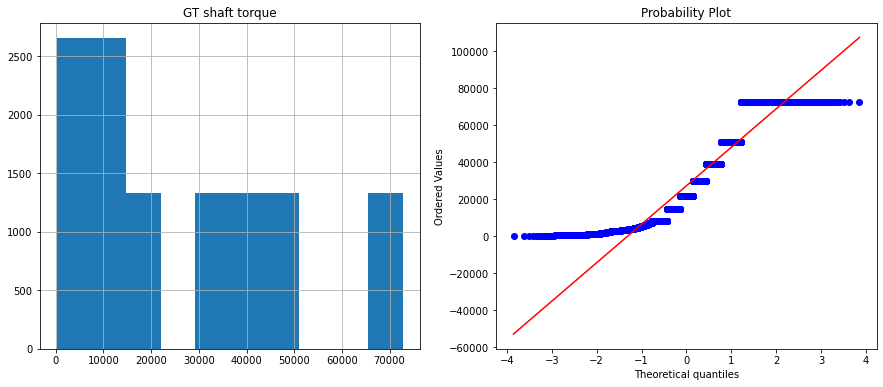

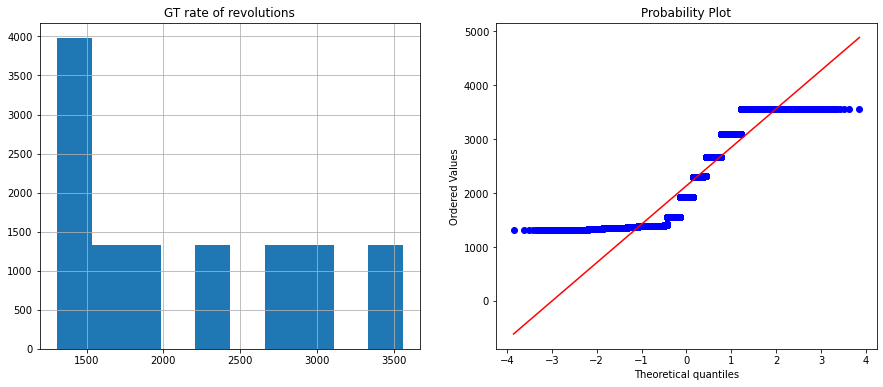

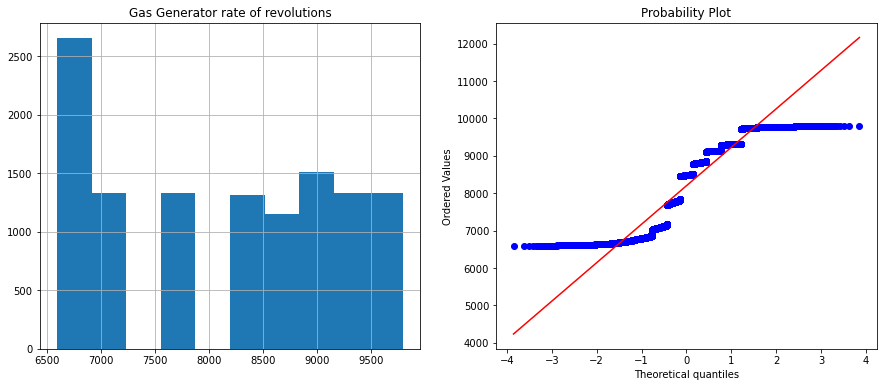

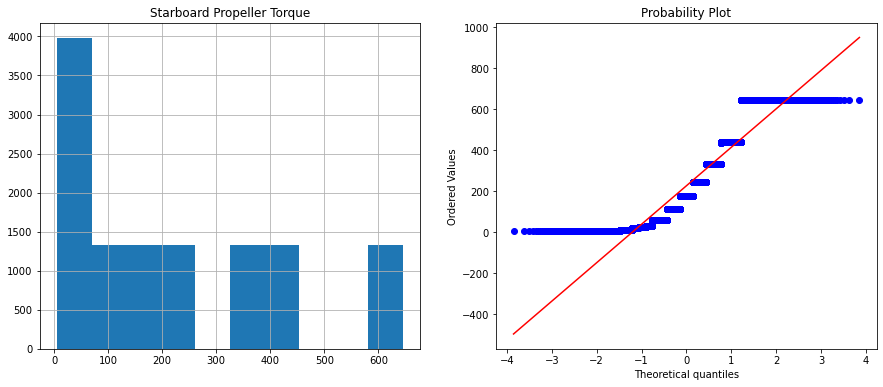

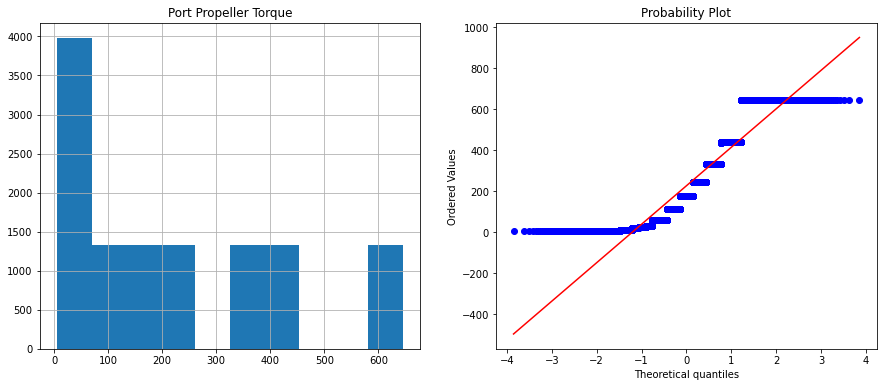

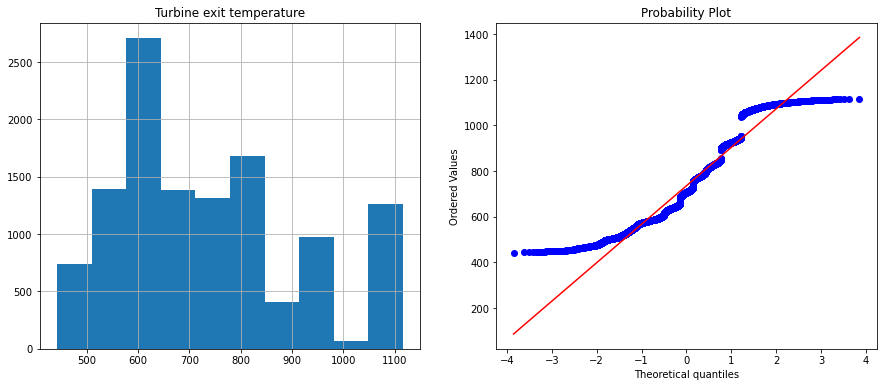

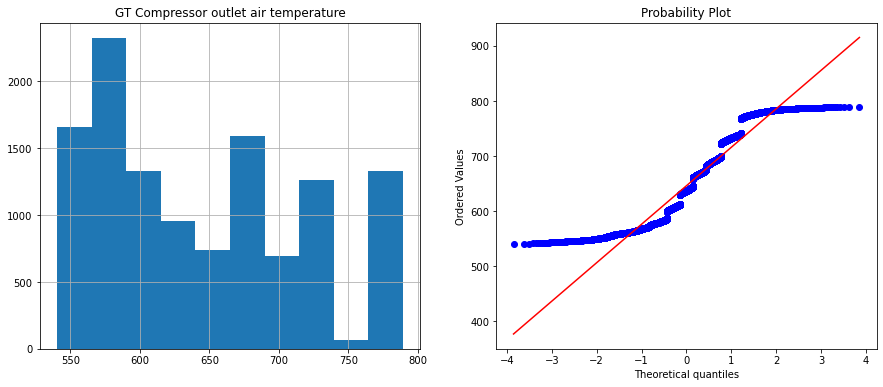

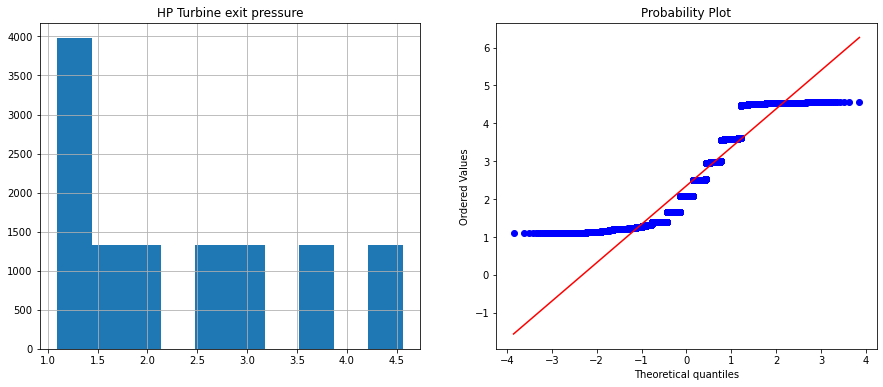

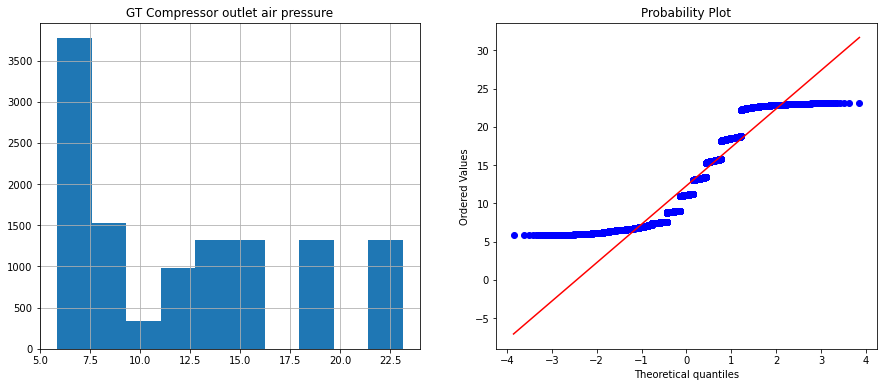

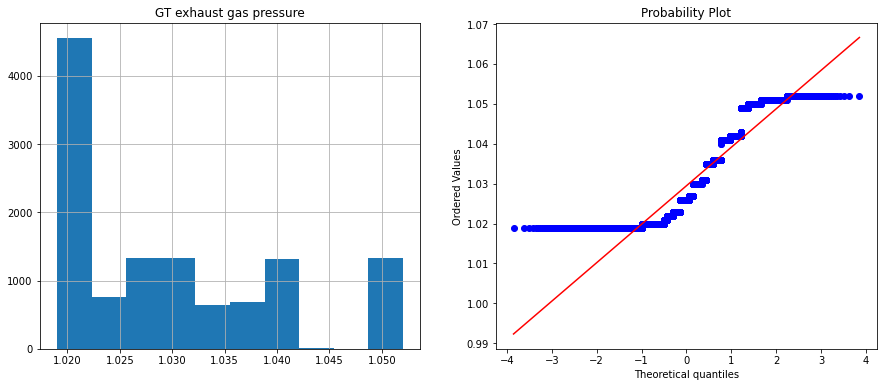

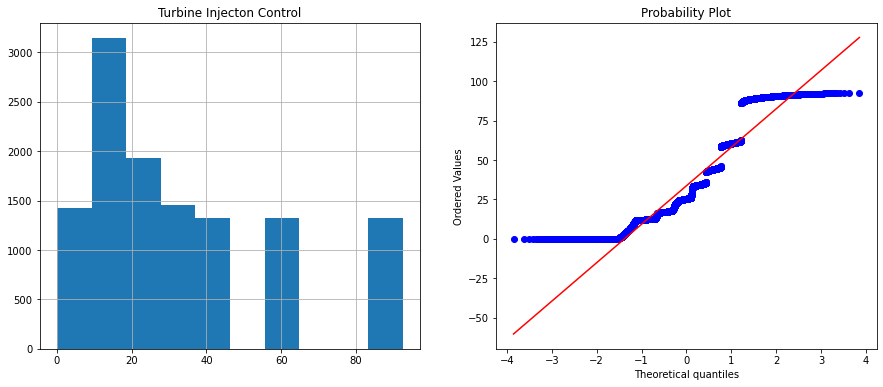

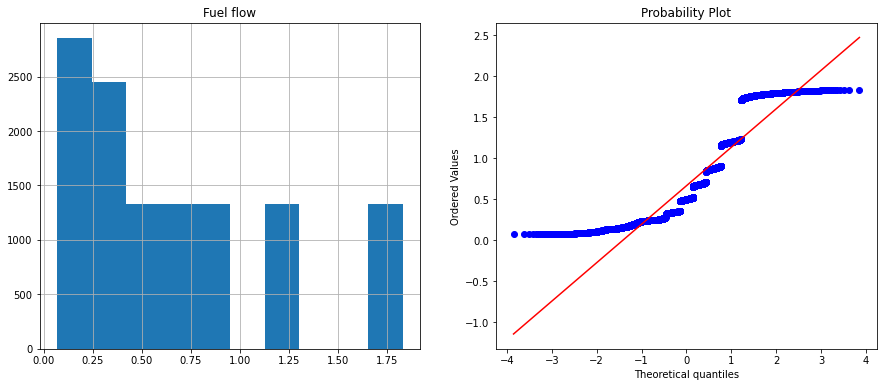

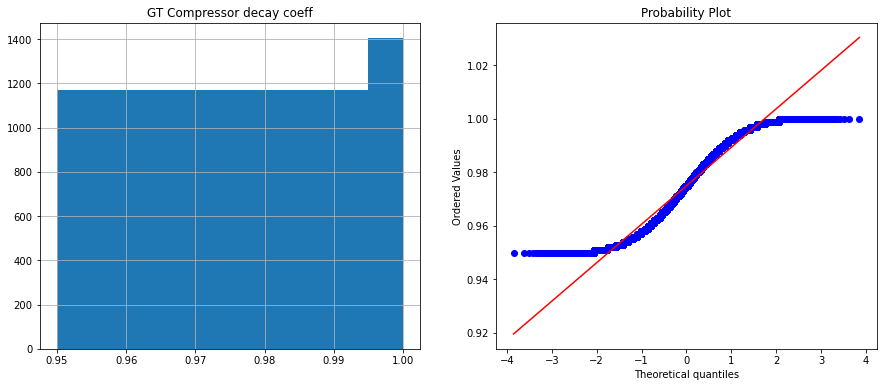

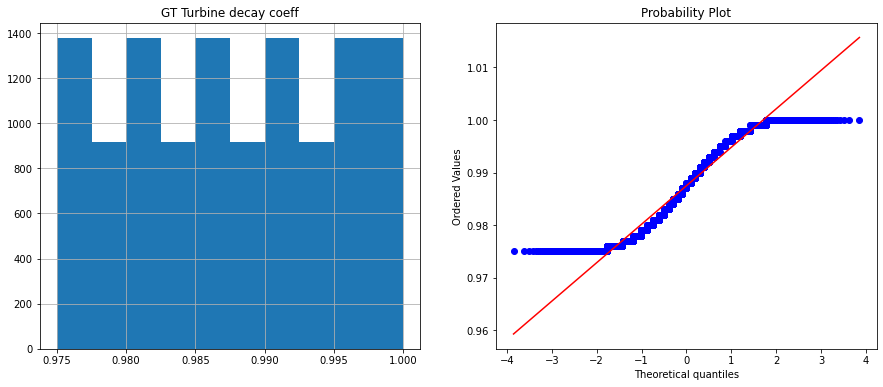

In [17]:

 
def qqplot(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.title(str(variable))
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()

def checknormal(df,varlist):
    for i in varlist:
        stat, p= shapiro(df[i])
        alpha = 0.05
        if p > alpha:
            print(str(i)+' is Normal')
        else:

            print(str(i)+' is not Normal')

def logt(df,variable):
    df[variable]=np.log(df[variable]+1)
    return df[variable]
 
def  boxcox(df,variable):
    df[variable],param=stats.boxcox(df[variable]+1)
    return df[variable]
 

def reciprocal(df,variable):
    df[variable]= 1/(df[variable]+1)
    return df[variable]
 
def squareroot (df,variable):
    df[variable]=df[variable]**(1/2)
    return df[variable]
 
def exponential(df,variable):
    df[variable]=df[variable]**(1/5)
    return df[variable]
 
    
for i in df1.columns:
    qqplot(df1,i)



In [18]:
columns=df1.columns
checknormal(df1,columns)
print("__________________________________________________________________________")
print("After applying Boxcox tranformation")
print("__________________________________________________________________________")
for i in columns:
    boxcox(df1,i)
checknormal(df1,columns)
print("__________________________________________________________________________")
print("After applying Reciprocal transformation")
print("__________________________________________________________________________")
for i in columns:
    reciprocal(df1,i)
checknormal(df1,columns)
print("__________________________________________________________________________")
print("After applying Squareroot transformation")
print("__________________________________________________________________________")

for i in columns:
    squareroot(df1,i)
checknormal(df1,columns)
print("__________________________________________________________________________")
print("After applying Exponential transformation")
print("__________________________________________________________________________")
for i in columns:
    exponential(df1,i)
checknormal(df1,columns)

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


GT shaft torque is not Normal
GT rate of revolutions is not Normal
Gas Generator rate of revolutions is not Normal
Starboard Propeller Torque is not Normal
Port Propeller Torque is not Normal
Turbine exit temperature is not Normal
GT Compressor outlet air temperature is not Normal
HP Turbine exit pressure is not Normal
GT Compressor outlet air pressure is not Normal
GT exhaust gas pressure is not Normal
Turbine Injecton Control is not Normal
Fuel flow is not Normal
GT Compressor decay coeff is not Normal
GT Turbine decay coeff is not Normal
__________________________________________________________________________
After applying Boxcox tranformation
__________________________________________________________________________
GT shaft torque is not Normal
GT rate of revolutions is not Normal
Gas Generator rate of revolutions is not Normal
Starboard Propeller Torque is not Normal
Port Propeller Torque is not Normal
Turbine exit temperature is not Normal
GT Compressor outlet air temperature

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [19]:

X = df.drop(columns=['GT Compressor decay coeff','GT Turbine decay coeff','Ship speed','Lever position'])
Y1 = df['GT Compressor decay coeff']
Y2 = df['GT Turbine decay coeff'] 

In [20]:
model_xgb = XGBRegressor(learning_rate=0.05, max_depth=5, 
                             n_estimators=500,
                             random_state =42)
model_RF = RandomForestRegressor(n_estimators=100)
model_linear= LinearRegression()

In [21]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,Y1)
X_train2,X_test2,y_train2,y_test2=train_test_split(X,Y2)


In [22]:
def model_analysis(model_name,model,x_train,y_train,x_test,y_test,x,y):
    
    model.fit(x_train,y_train)
    fitted_values=model.predict(x_train)
    preds=model.predict(x_test)
    print(model_name+" analysis:\n")
    
    r2_train=r2_score(y_train,fitted_values)
    print("r squared train = ",r2_train)
    r2_test=r2_score(y_test,preds)
    print("r squared test = ",r2_test)
    residuals_train=y_train-fitted_values
    durbin_train=durbin_watson(residuals_train)
    print("durbin watson statistics train = ",durbin_train)
    residuals_test=y_test-preds
    durbin_test=durbin_watson(residuals_test)
    print("durbin watson statistics test = ",durbin_test)
    mape_train=np.mean(np.abs((residuals_train) / y_train)) * 100
    print("MAPE train = ",mape_train)
    mape_test=np.mean(np.abs((residuals_test) / y_test)) * 100
    print("MAPE test = ",mape_test)
    vif=1/(1-(r2_test))
    print("VIF = ",vif)    
    mse=mean_squared_error(y_test,preds)
    aic = 2*8 - 2*np.log(mse)
    print("AIC = ",aic)
    bic=2*np.log(184)- 2*np.log(mse)
    print("BIC = ",bic)
    
   
    val_score= cross_val_score(model, x, y,
                              cv=5)

    print("R square validation score",val_score)
    print(" ")

In [23]:

model_analysis("XGBRegressor on Compressor decay",model_xgb,X_train1,y_train1,X_test1,y_test1,X,Y1)

model_analysis("XGBRegressor on Turbine decay",model_xgb,X_train2,y_train2,X_test2,y_test2,X,Y2)

XGBRegressor on Compressor decay analysis:

r squared train =  0.9970065524853547
r squared test =  0.9934136348201009
durbin watson statistics train =  1.974756210961607
durbin watson statistics test =  1.99317831404941
MAPE train =  0.062321824529217064
MAPE test =  0.0883570347345821
VIF =  151.82881189945238
AIC =  42.91024441044448
BIC =  37.340115925662445
R square validation score [-4.39901483 -0.34606109  0.19021938  0.195694   -6.87860186]
 
XGBRegressor on Turbine decay analysis:

r squared train =  0.9941540683223816
r squared test =  0.9833336070115178
durbin watson statistics train =  1.9850806752699741
durbin watson statistics test =  1.986030015822558
MAPE train =  0.04284593077154332
MAPE test =  0.06464202873588332
VIF =  60.00098525764284
AIC =  43.75577351565305
BIC =  38.18564503087102
R square validation score [0.70385522 0.94197828 0.96734765 0.95519571 0.76620298]
 


In [24]:

model_analysis("Random Forest on Compressor decay",model_RF,X_train1,y_train1,X_test1,y_test1,X,Y1)

model_analysis("Random Forest on Turbine decay",model_RF,X_train2,y_train2,X_test2,y_test2,X,Y2)

Random Forest on Compressor decay analysis:

r squared train =  0.9993503784989585
r squared test =  0.9950687902996573
durbin watson statistics train =  1.9888378700304068
durbin watson statistics test =  2.002142090756698
MAPE train =  0.020024095276029396
MAPE test =  0.053234619683983894
VIF =  202.78999693128262
AIC =  43.48907900453136
BIC =  37.91895051974933
R square validation score [-6.07871603 -1.38632968  0.22573254 -0.83661812 -8.43823194]
 
Random Forest on Turbine decay analysis:

r squared train =  0.9985812242330296
r squared test =  0.988849570798747
durbin watson statistics train =  1.9910817714584839
durbin watson statistics test =  1.950557750108765
MAPE train =  0.01463154377282851
MAPE test =  0.03760285425523518
VIF =  89.68264646598803
AIC =  44.55960612641895
BIC =  38.989477641636924
R square validation score [0.57396724 0.94513445 0.97039754 0.95236746 0.74369698]
 


In [25]:

model_analysis("Linear Regressor on Compressor decay",model_linear,X_train1,y_train1,X_test1,y_test1,X,Y1)

model_analysis("Linear Regressor on Turbine decay",model_linear,X_train2,y_train2,X_test2,y_test2,X,Y2)

Linear Regressor on Compressor decay analysis:

r squared train =  0.7791312343800083
r squared test =  0.780765154975997
durbin watson statistics train =  1.9662336756118395
durbin watson statistics test =  2.0312734186360033
MAPE train =  0.5905526497198208
MAPE test =  0.5881750261346534
VIF =  4.561318707756126
AIC =  35.899960657155674
BIC =  30.329832172373642
R square validation score [-12.80315078  -3.57521823  -1.34203996  -3.80140219 -14.04109343]
 
Linear Regressor on Turbine decay analysis:

r squared train =  0.822016838347303
r squared test =  0.8205626480426452
durbin watson statistics train =  1.9890183410149744
durbin watson statistics test =  2.0236738067018964
MAPE train =  0.24419518517620914
MAPE test =  0.243777680381669
VIF =  5.572975688125741
AIC =  39.002909841834224
BIC =  33.43278135705219
R square validation score [0.79617562 0.81067349 0.802947   0.82158025 0.81909458]
 
